### Importação dos dados



In [62]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [63]:
import matplotlib.pyplot as plt

In [64]:
# Valor total das vendas por loja
faturamento_loja1 = loja['Preço'].astype(float).sum()
faturamento_loja2 = loja2['Preço'].astype(float).sum()
faturamento_loja3 = loja3['Preço'].astype(float).sum()
faturamento_loja4 = loja4['Preço'].astype(float).sum()

# Print dos resultados
print(f'Faturamento loja 1: R${faturamento_loja1:.2f}')
print(f'Faturamento loja 2: R${faturamento_loja2:.2f}')
print(f'Faturamento loja 3: R${faturamento_loja3:.2f}')
print(f'Faturamento loja 4: R${faturamento_loja4:.2f}')

# Somando o faturamento das lojas
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f'\nFaturamento total de todas as lojas: R${faturamento_total:.2f}')

Faturamento loja 1: R$1534509.12
Faturamento loja 2: R$1488459.06
Faturamento loja 3: R$1464025.03
Faturamento loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


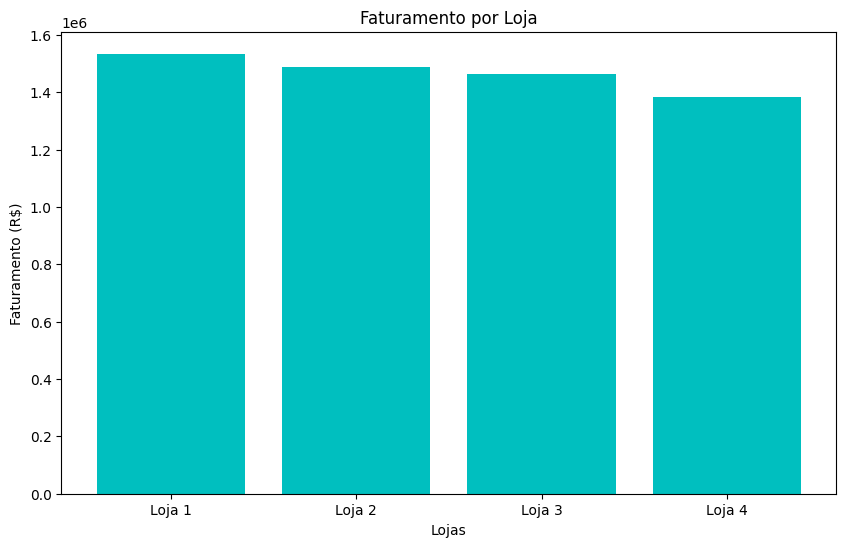

In [65]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color='c')
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')


plt.show()

# 2. Vendas por Categoria


In [66]:
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria na Loja {numero}:")
    print(vendas)

vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

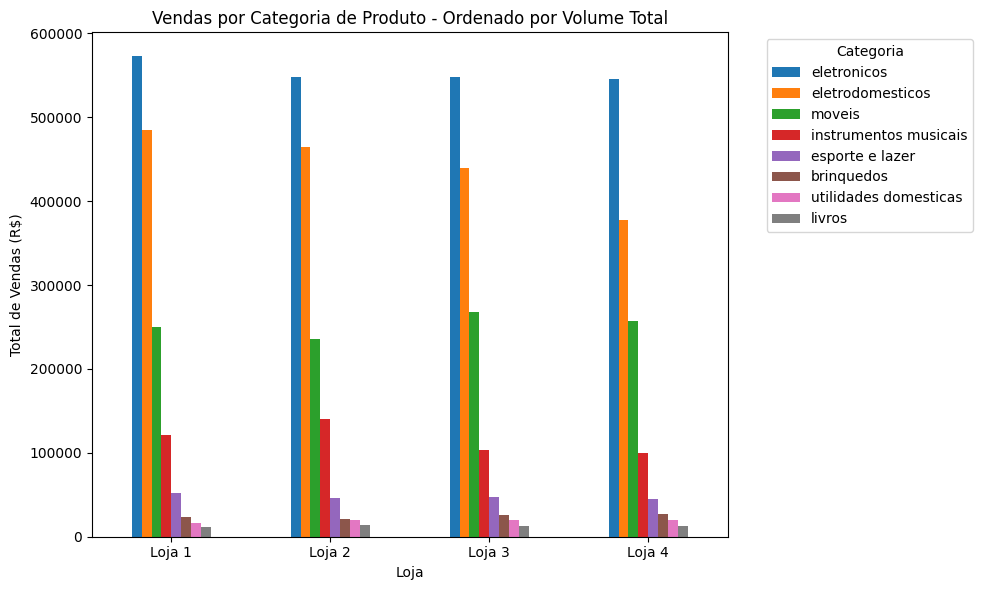

In [67]:
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# DF com somas por categoria para cada loja
df_vendas_categoria = pd.DataFrame()

for nome_loja, df in lojas.items():
    vendas = df.groupby('Categoria do Produto')['Preço'].sum()
    df_vendas_categoria[nome_loja] = vendas


# Ordenando as categorias
total_por_categoria = df_vendas_categoria.sum(axis=1).sort_values(ascending=False)
df_vendas_categoria = df_vendas_categoria.loc[total_por_categoria.index]
df_vendas_categoria = df_vendas_categoria.T

# Gerando o gráfico agrupado
df_vendas_categoria.plot(kind='bar', figsize=(10, 6))
plt.title('Vendas por Categoria de Produto - Ordenado por Volume Total')
plt.xlabel('Loja')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [68]:
def avaliacao_media(loja, numero):
    media = loja['Avaliação da compra'].mean()
    print(f"Avaliação média na Loja {numero}: {media:.2f}")

avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)

Avaliação média na Loja 1: 3.98
Avaliação média na Loja 2: 4.04
Avaliação média na Loja 3: 4.05
Avaliação média na Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [69]:
urls = [url, url2, url3, url4]

df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é igual a preço
df_total['Receita'] = df_total['Preço']

# Agrupar por loja e produto e somar a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

#  3 produtos que mais e menos geram dinheiro
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
    menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

# Lista única de lojas
lojas_unicas = vendas['Loja'].unique()

# Mostrar resultados para cada loja
for loja in lojas_unicas:
    top_produtos(loja)


Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.

# 5. Frete Médio por Loja


In [70]:
# Garantir que o custo de envio é numérico
df_total['Frete'] = df_total['Frete'].astype(float)

# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean()

# Mostrar resultados
print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio:.2f}")


Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


# Gráficos

In [71]:
df_total['Preço'] = df_total['Preço'].astype(float)

# Garantir tipo correto
df_total['Preço'] = df_total['Preço'].astype(float)

# A receita de cada venda é simplesmente o preço
df_total['Receita'] = df_total['Preço']

# Agrupar dados
receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

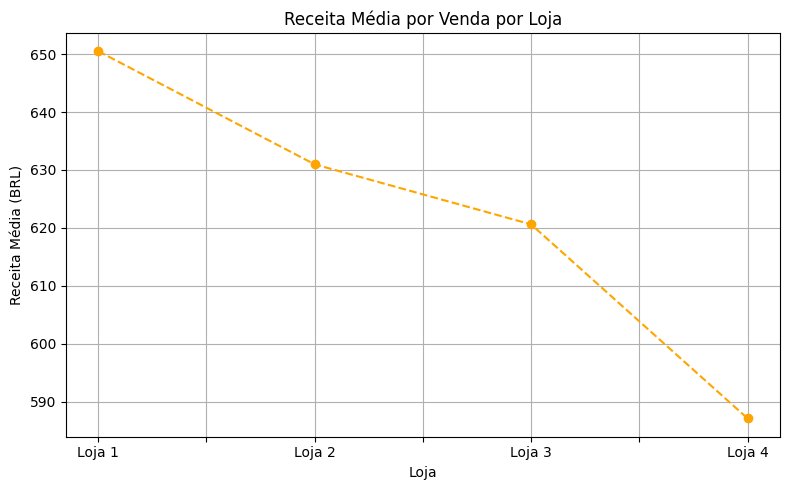

In [72]:
plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Receita Média por Venda por Loja')
plt.ylabel('Receita Média (BRL)')
plt.xlabel('Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

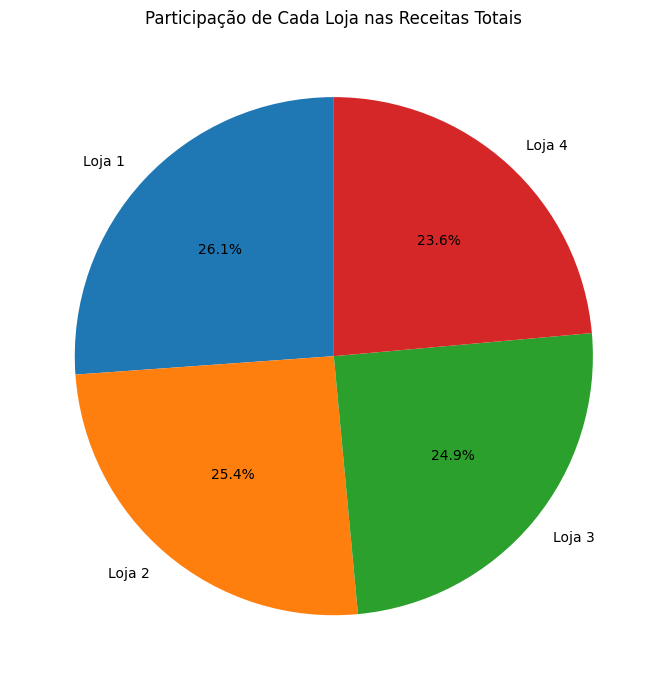

In [73]:
plt.figure(figsize=(7,7))
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas Totais')
plt.ylabel('')
plt.tight_layout()
plt.show()

#Relatório

## Faturamento

Após análises do faturamento das 4 lojas da AluraStore foi possível observar que loja 1 é a que apresenta o maior faturamento, no total de 1.534.509,12 reais, enquanto que a loja 4 é a que apresenta um menor faturamento, no total de 1.384.497,58 reais.

## Vendas por categoria

Foi observado que todas as lojas possuiem maior representatividade na receita total com as vendas de eletrônicos, eletrodomésticos e móveis, sucessitavemente. A loja 1 apresentou maior montante de venda nas categorias de eletrônicos e eletrodomésticos enquanto a loja 4 foi a que apresentou menores montantes de venda. Apesar da loja 4 ter apresentado maiores vendas nas categorias de livros, utlidades domésticas e brinquedos, elas são as menos representativas na receita total.


## Média de avaliação dos clientes

A loja 3 apresentou a maior média geral de avaliações, no total de 4.05, seguido da loja 2 com média de 4.04, loja 03 com média de 4 e por fim a loja 1 com a menor nota apresentada, de 3.98.


## Produtos mais e menos vendidos

**Loja 1**

TOP 3 produtos que MAIS dinheiro geraram:

  * TV Led UHD 4K - Receita: R$189534.28

  * Geladeira - Receita: R$149524.28

  * Celular Plus X42 - Receita: R$130536.40

TOP 3 produtos que MENOS dinheiro geraram:
  * Corda de pular - Receita: R$870.89

  * Dinossauro Rex - Receita: R$918.40

  * Cubo mágico 8x8 - Receita: R$929.27

**Loja 2**

TOP 3 produtos que MAIS dinheiro geraram:
  * Celular Plus X42 - Receita: R$150967.83

  * TV Led UHD 4K - Receita: R$137833.06

  * Geladeira - Receita: R$130176.48

TOP 3 produtos que MENOS dinheiro geraram:
  * Cubo mágico 8x8 - Receita: R$858.22

  * Dinossauro Rex - Receita: R$1027.41

  * Corda de pular - Receita: R$1142.54

**Loja 3**

TOP 3 produtos que MAIS dinheiro geraram:
  * Geladeira - Receita: R$133185.99

  * TV Led UHD 4K - Receita: R$128892.11

  * Celular Plus X42 - Receita: R$124300.84

TOP 3 produtos que MENOS dinheiro geraram:
  * Cubo mágico 8x8 - Receita: R$853.81

  * Dinossauro Rex - Receita: R$1060.78

  * Corda de pular - Receita: R$1137.76

**Loja 4**

TOP 3 produtos que MAIS dinheiro geraram:
  * Celular Plus X42 - Receita: R$128930.07

  * TV Led UHD 4K - Receita: R$120393.25

  * Smart TV - Receita: R$110387.57

TOP 3 produtos que MENOS dinheiro geraram:
  * Corda de pular - Receita: R$939.74

  * Cubo mágico 8x8 - Receita: R$997.38

  * Dinossauro Rex - Receita: R$1143.94

## Envio médio por loja


A loja 4 é a que possui o menor custo médio de frete, no valor de 31,28 reais, seguida da loja 3 com custo médio de 33,07 reais, loja 2 com o custo médio de 33,62 reais, e a loja 1 com o custo médio mais caro, no valor de 34,69 reais.

## Conclusão

Após as análises realizadas nas 4 lojas da AluraStore foi observado que a loja 1 é a mais rentável apresentando maior venda dos itens que geram maior valor agregado e que possui maior participação na receita total (26,01%). Embora todas as lojas possuam resultados semelhantes, a que apresentou menores resultados foi a loja 4, com vendas inferiores e menor participação na receita total (23,06%).

Com relação aos outros fatores analisados, como a avaliação média dos clientes e custo médio do frete, apesar da loja 4 ter apresentados maiores resultados, comparado a loja 1, eles passam a ser irrelevantes já que a loja 4 não possui maiores vendas, o que pode resultar em melhores avaliações e custo de frete médio menores.